
# Project: Investigate the no-show appointments dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

Data Dictionary

01 - PatientId:
Identification of a patient

02 - AppointmentID:
Identification of each appointment

03 - Gender:
Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.

04 - ScheduledDay:
The day someone called or registered the appointment, this is before appointment of course.

05 - AppointmentDay:
tells us on what day the patient set up their appointment.

06 - Age:
How old is the patient.

07 - Neighbourhood:
Where the appointment takes place.

08 - Scholarship:
1 or 0 indicates True or False.. indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

09 - Hipertension:
1 or 0 indicates True or False.

10 - Diabetes:
1 or 0 indicates True or False.

11 - Alcoholism:
1 or 0 indicates True or False.

12 - Handcap:
1 or 0 indicates True or False.

13 - SMS_received:
1 or more messages sent to the patient.

14 - No-show:
'Yes' or 'No'.

## Questions to Explore:
first we will define waiting time as the number of days from registering for an appointment untill the appointment day.
- Is gender of the patient related to showing up in the appointment?
- Is receiving an SMS affect showing up in the appointment?
- Is having a scholarship somehow related to showing up?
- What is the proportion of patients who have been diagnosed with Diabetes, Alchoholism, Handicap or Hypertension and show up to those who have but didn't show up?
- What is the showing up rate associeted with each neighbourhood?
- What is the age distribution and is there a range where it is more likely to show up?
- Is there a relationship between the waiting time and the number of patients showing up?

In [1]:
# importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('no-show_appointments.csv')
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [3]:
# show information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [5]:
df.isna().any().any()

False

there is no null values 

In [6]:
df.duplicated().any()

False

there is no duplicates

- there is no need for PatientId or AppointmentID columns to answer our questions so we will drop them.
- ScheduledDay and AppointmentDay columns need to be converted to datetime format and then we calculate the waiting time from them.
- there is some typos in the column names and it would be better if they are lowercase separeted by '_'.
- Handcap has five unique values, it should contain only 1s and 0s.
- the No-show column has Yes and No values it would be easier to deal with 1s and 0s.
- the Age column is interesting it has 104 values that mean that the oldest person is at least 104 years old so we get a further look to that.

In [7]:
# Exploring the age column for more insight
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

interesting there are some ghosts with -1 years old we have to drop those

In [8]:
# Exploring the handicap column 
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

the handicap column should be represented by 1s and 0s so all values greater than 1 will be casted to 1

### Data Cleaning 
- drop PatientId and AppointmentID columns .
- convert ScheduledDay and AppointmentDay columns to datetime.
- correct typos in the column names and it would be better if they are lowercase separeted by '_'.
- Handcap has five unique values, it should contain only 1s and 0s.
- the No-show column has Yes and No values it would be easier to deal with 1s and 0s.
- drop values less than 0 from the Age column

In [9]:
# drop the unnecessary columns
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [10]:
# convert ScheduledDay and AppointmentDay to datetime format
df[['ScheduledDay', 'AppointmentDay']] = df[['ScheduledDay', 'AppointmentDay']].astype(np.datetime64)


In [11]:
# correct typos
df.rename(columns={'Handcap': 'handicap', 'Hipertension': 'hypertension', 'No-show': 'no_show'}, inplace=True)
# make column's names lower_case
df.rename(lambda x: x.replace('Day', '_day').lower(), axis=1, inplace=True)
# check
df.head(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [12]:
# Correcting Handcap data
df.loc[df["handicap"] > 1, 'handicap'] = 1
# check should be 0 and 1
df['handicap'].unique()

array([0, 1], dtype=int64)

In [13]:
# it is easy to deal with 1 and 0 rather than yes and no
df["no_show"].replace(['Yes', 'No'], [1, 0], inplace=True)
# check should be 0 and 1 
df['no_show'].unique()

array([0, 1], dtype=int64)

In [14]:
# drop values less than 0 from the age column
df.drop(df.query("age < 0").index, inplace=True, axis=0)
# check if False we're good
(df['age'] < 0).any()

False

create the `waiting_time` column

In [15]:
df = df.assign(waiting_time= df['appointment_day'].dt.day - df['scheduled_day'].dt.day)
df.head(3)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0


create a column if the patient has a special condition (hypertension, diabetes, alcoholism, handicap) true if any false otherwise

In [16]:
df = df.assign(special_cond=df[['hypertension', 'diabetes', 'alcoholism', 'handicap']].any(axis=1))
df.head(3)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time,special_cond
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,True
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,False
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,False


let's explore the data once more 

In [17]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029,0.201934,-1.752845
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874,0.401445,10.329655
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


there is somthing weird here in the `waiting_time` column it looks like some of the values are negative
so we need to look at the distripution of waiting time to figure out a way to fix that

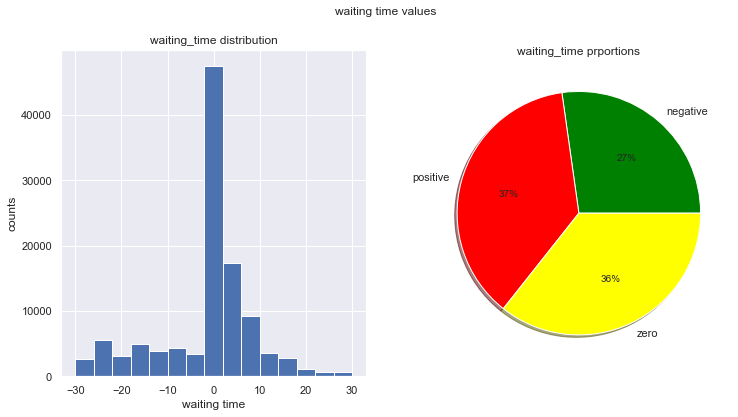

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("waiting time values")
axs[0].hist(df['waiting_time'], bins=15)
axs[0].set_title("waiting_time distribution")
axs[0].set_xlabel("waiting time")
axs[0].set_ylabel("counts")
axs[1].pie([len(df.query("waiting_time < 0")), len(df.query("waiting_time > 0")), len(df.query("waiting_time == 0"))],
           labels=['negative', 'positive', 'zero'],
           colors=['green', 'red', 'yellow'], shadow=True, autopct="%1.0f%%")
axs[1].set_title('waiting_time prportions')
plt.show()


In [19]:
df.query("waiting_time < 0").head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time,special_cond
49,F,2016-03-31 17:11:17,2016-04-29,27,GRANDE VITÓRIA,0,0,0,0,0,1,1,-2,False
50,F,2016-03-31 17:12:45,2016-04-29,19,GRANDE VITÓRIA,0,0,0,0,0,1,1,-2,False
51,F,2016-03-31 17:05:31,2016-04-29,23,GRANDE VITÓRIA,1,0,0,0,0,1,1,-2,False
52,F,2016-03-31 17:06:17,2016-04-29,23,GRANDE VITÓRIA,1,0,0,0,0,1,1,-2,False
183,M,2016-03-30 07:32:47,2016-04-29,69,CONQUISTA,0,0,0,0,0,1,0,-1,False


so I think it's not the best solution to drop all negative values (27% of the data we have is too much) but the documentation of the dataset idicates that the schedualed day should be after the appointment day so I will assume that the columns were swaped regarding to some sort of mergeing dataframes or something by mistake and take the absolute value of the waiting time

In [20]:
df['waiting_time'] = df['waiting_time'].abs()

Now we don't need `appointment_day` and `scheduled_day` columns any more we can drop them

In [21]:
# # drop the appointment_day and the scheduled_day 
df.drop(columns=['scheduled_day', 'appointment_day'], inplace=True)
df.head(3)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time,special_cond
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,True
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,False
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,False


it would be easier if we divide the data to two data frames `df_showing` for patients who show up and `df_not_showing` for those who didn't

In [22]:
df_showing = df.query("no_show == 0")
df_not_showing = df.loc[~df.index.isin(df_showing.index)]
df_showing.head(3)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time,special_cond
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,True
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,False
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,False


In [23]:
df_not_showing.head(3)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time,special_cond
6,F,23,GOIABEIRAS,0,0,0,0,0,0,1,2,False
7,F,39,GOIABEIRAS,0,0,0,0,0,0,1,2,False
11,M,29,NOVA PALESTINA,0,0,0,0,0,1,1,3,False


let's explore tha data a little further 

In [24]:
showing_count = len(df_showing)
not_showing_count = len(df_not_showing)
showing_count, not_showing_count

(88207, 22319)

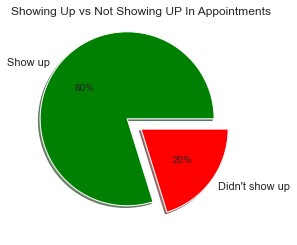

In [25]:
# precentage of showing to not showing 
plt.pie([showing_count, not_showing_count], labels=["Show up", "Didn't show up"],
        colors=['green', 'red'], explode=[0.2, 0], shadow=True, autopct="%1.0f%%")

plt.title("Showing Up vs Not Showing UP In Appointments") 
plt.show()

approximately 20% of the patients didn't show up in there appointments

I will explore general properties of the data with histograms before procceding

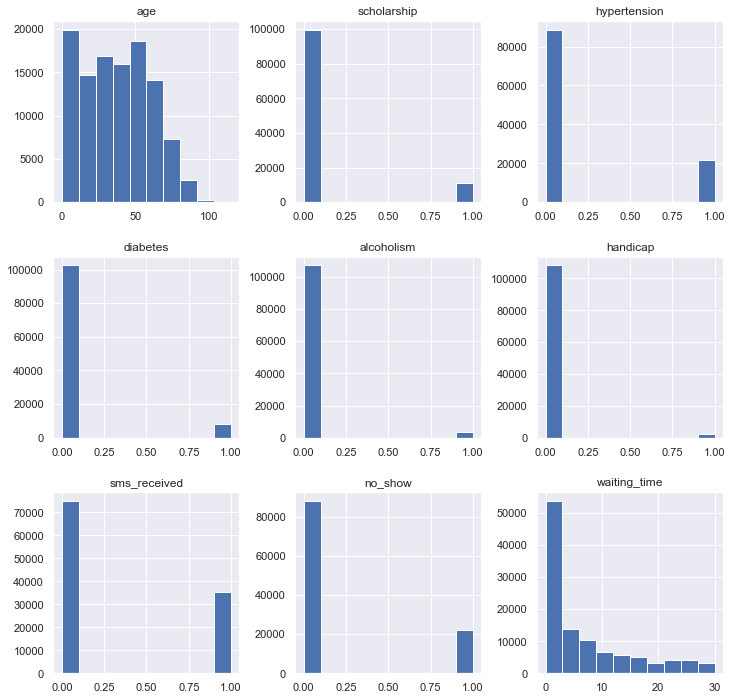

In [26]:
df.hist(figsize=(12, 12));

- looks like the age distribution is right skewd as well as the waiting time distribution
- not many patients have a handicap or diagnosed with diabetes or alchoholism
- not many patients have a scholarship
- nearly half of the patients recieved an SMS
- 20% of the patients didn't show up in the appointment
- about 20% of the patients diagnosed with hypertension

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 Is gender of the patient related to showing up in the appointment?

In [27]:
def cond_props_bar(col, cond1, cond2, labels, title, xlabel, ylabel):
    """Returns the proportions of patients show up"""
    with_cond1 = len(df_showing.query("{} {}".format(col, cond1))) / len(df.query("{} {}".format(col, cond1)))
    with_cond2 = len(df_showing.query("{} {}".format(col, cond2))) / len(df.query("{} {}".format(col, cond2)))
    plt.bar(labels, height=[with_cond1, with_cond2])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    return with_cond1, with_cond2

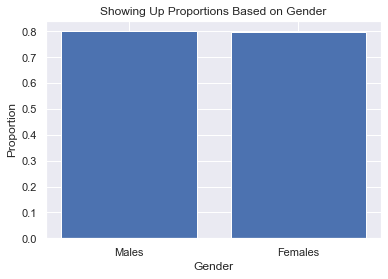

In [28]:
# compare males and females
males_showing_prop, females_showing_prop = cond_props_bar(col='gender', cond1='== "M"', cond2='== "F"', labels=["Males", "Females"],
                                                          title="Showing Up Proportions Based on Gender", xlabel="Gender", ylabel="Proportion")

In [29]:
print("{:.2f}% of males showed up in there appointments.".format(males_showing_prop * 100))
print("{:.2f}% of females showed up in there appointment.".format(females_showing_prop* 100))

80.03% of males showed up in there appointments.
79.69% of females showed up in there appointment.


So it's obvious that the gender of the patient doesn't affect showing up in the appointment since males have a showing up percentage 80.03%
and females have a showing up percentage 79.69% so close to be the same.

### Research Question 2  : Is receiving an SMS affect showing up in the appointment?

In [30]:
# percentage of patients who received an SMS
len(df.query('sms_received == 1')) / len(df) * 100

32.10285362720084

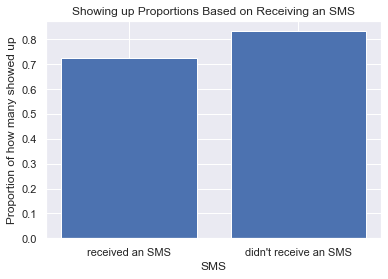

In [31]:
# receiving an SMS

received, not_received = cond_props_bar(col="sms_received", cond1="== 1", cond2="== 0", labels=['received an SMS', "didn't receive an SMS"], 
                                        title="Showing up Proportions Based on Receiving an SMS", xlabel='SMS',
                                        ylabel='Proportion of how many showed up')

In [32]:
# percentage of who showed up from people who received an SMS
received * 100, not_received * 100 

(72.425455160363, 83.29646607323703)

In [33]:
print("People who didn't recieve an SMS have a showing up percentage higher by {:.2f}% than those who recieved"\
    .format((not_received - received) * 100))

People who didn't recieve an SMS have a showing up percentage higher by 10.87% than those who recieved


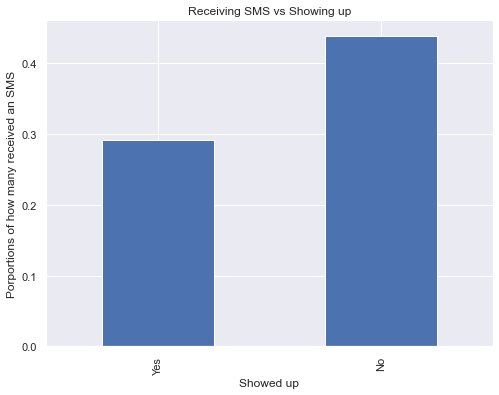

In [34]:
plt.subplots(figsize=(8, 6))
df.groupby('no_show')['sms_received'].mean().plot(kind='bar')
plt.title("Receiving SMS vs Showing up")
plt.xlabel('Showed up')
plt.ylabel('Porportions of how many received an SMS')
plt.xticks([0, 1], ['Yes', 'No'])
plt.show()

In [35]:
df.groupby('no_show')['sms_received'].mean() * 100

no_show
0    29.133742
1    43.837089
Name: sms_received, dtype: float64

- 32.11% of the patients recieved an SMS
- 72.43 of those who recieved an SMS showed up and 83.30% of those who didn't receive an SMS showed up
- People who didn't recieve an SMS have a showing up percentage higher by 10.87% than those who recieved
- 29.13% of people who showed up received an SMS and 43.84% of people who didn't show up received an SMS.

so based on these facts we see that although the proportion of people who show up from those who didn't receive an SMS is higher we can't say that there is a correlation here.


### Research Question 3  : Is the having a scholarship somehow related to showing up?


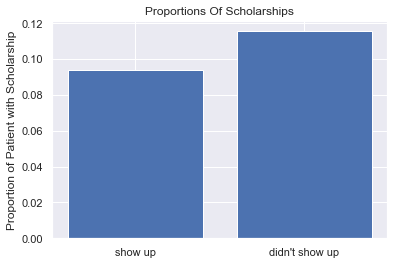

In [36]:
plt.bar(['show up', "didn't show up"], height=[df_showing['scholarship'].mean(), df_not_showing['scholarship'].mean()])
plt.ylabel("Proportion of Patient with Scholarship")
plt.title("proportions of scholarships".title());

In [37]:
print("{:.2f}% of people who show up have a scholarship.\n{:.2f}% of people who didn't show up have a scholarship."\
      .format(df_showing['scholarship'].mean() * 100, df_not_showing['scholarship'].mean() * 100))

9.39% of people who show up have a scholarship.
11.55% of people who didn't show up have a scholarship.


we see that 11.55% of the people that didn't show up have a scholarship thats higher than those who did show up by 2.16% and this difference is relatively big.

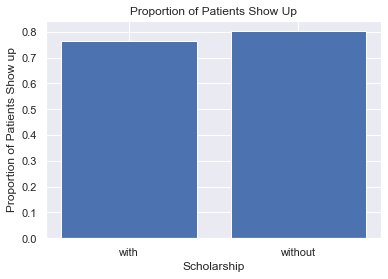

In [38]:

with_schol, without_schol = cond_props_bar(col='scholarship', cond1="== 1", cond2="== 0", labels=['with', 'without'],
                                           title="Proportion of Patients Show Up", xlabel="Scholarship",
                                           ylabel="Proportion of Patients Show up")


In [39]:
with_schol, without_schol

(0.7626369579228433, 0.8019264536196258)

In [40]:
without_schol - with_schol

0.03928949569678253

- 76.26% of people who have a scholarship show up and 80.19% of people who have no scholarship show up.
- we see that 11.55% of the people that didn't show up have a scholarship thats higher than those who did show up by 2.16% and this difference is relatively big.


### Research Question 4  : What is the proportion of patients who have been diagnosed with Diabetes, Alchoholism, Handicap or Hypertension and show up to those who have but didn't show up?

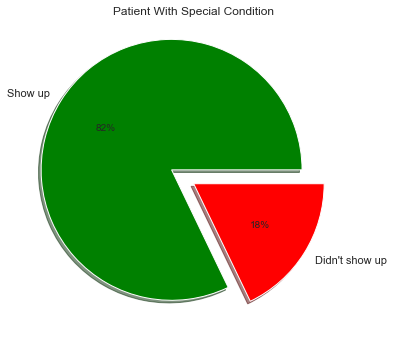

In [41]:
plt.figure(figsize=(6, 6))
plt.pie([df_showing['special_cond'].sum(), df_not_showing['special_cond'].sum()], labels=["Show up", "Didn't show up"],
        colors=['green', 'red'], explode=[0.2, 0], shadow=True, autopct="%1.0f%%")
plt.title("Patient With Special Condition")
plt.show()

- 82% of patients were having a special condition and show up and only 18% didn't show up.

### Research Question 5  : What is the showing up rate associeted with each neighbourhood?

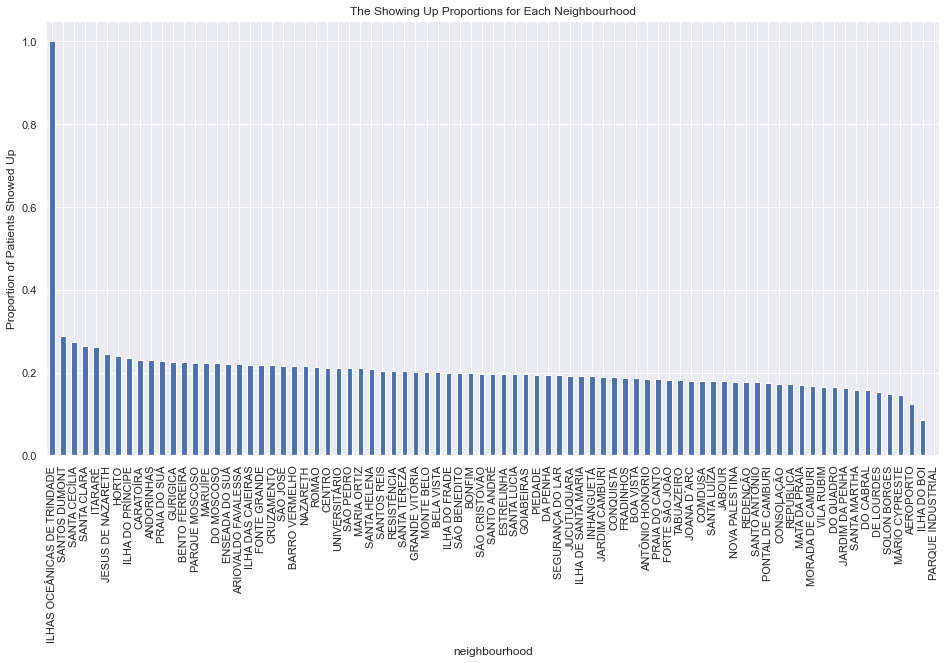

In [42]:
plt.figure(figsize=(16, 8))
df.groupby('neighbourhood')['no_show'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("The Showing Up Proportions for Each Neighbourhood")
plt.ylabel("Proportion of Patients Showed Up")
plt.show()

In [43]:
df.groupby('neighbourhood')['no_show'].mean().idxmax()

'ILHAS OCEÂNICAS DE TRINDADE'

In [44]:
len(df.query("neighbourhood == 'ILHAS OCEÂNICAS DE TRINDADE'"))

2

- the highest neighbourhood showing up ratio is associated with 'ILHAS OCEÂNICAS DE TRINDADE' and that's obviosly because it only has two records
so we can't indicate somthing special.

### Research Question 6  : What is the age distribution and is there a range where it is more likely to show up?

In [45]:
def plot_hist(col, bins, title, xlabel, ylabel, legend, figsize):
    """plots a histogram"""
    plt.subplots(figsize=figsize)
    df[col].hist(bins=bins)
    df_showing[col].hist(bins=bins)
    df_not_showing[col].hist(bins=bins)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend(legend)
    plt.show()

In [46]:
def plot_kde(col, hue, bw_adjust, aspect, xlim, title, legend_labels, legend_title):
    """plots a kde distribution"""
    fig = sns.FacetGrid(data=df, hue=hue, aspect=aspect)
    fig.map(sns.kdeplot, col, shade=True, bw_adjust=bw_adjust)
    fig.set(xlim=xlim)
    plt.title(title)
    plt.legend(labels=legend_labels, title=legend_title)
    plt.show()
    

In [47]:
def cat_plot(x, y, kind, title, xlabel, ylabel):
    sns.catplot(x=x, y=y, kind=kind, data=df)
    plt.xticks([0, 1], ['Show up', 'Didn\'t show up'])
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

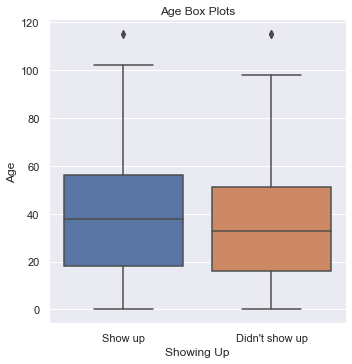

In [48]:
cat_plot(x='no_show', y='age', kind='box', title='Age Box Plots', xlabel='Showing Up', ylabel='Age')

both the age distrubutions of people who show up or didn't are pretty similer

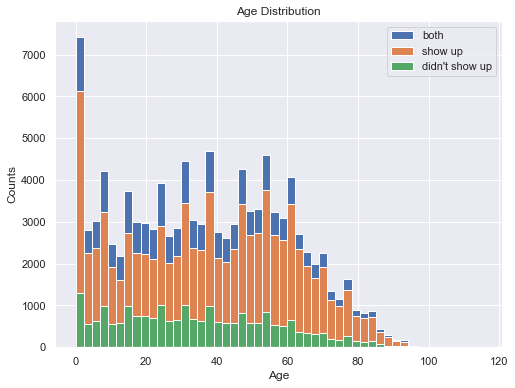

In [49]:
# the age distribution 
plot_hist(col='age', bins=50, title="Age Distribution", xlabel="Age", ylabel='Counts',
          legend=['both', 'show up', "didn't show up"], figsize=(8, 6))

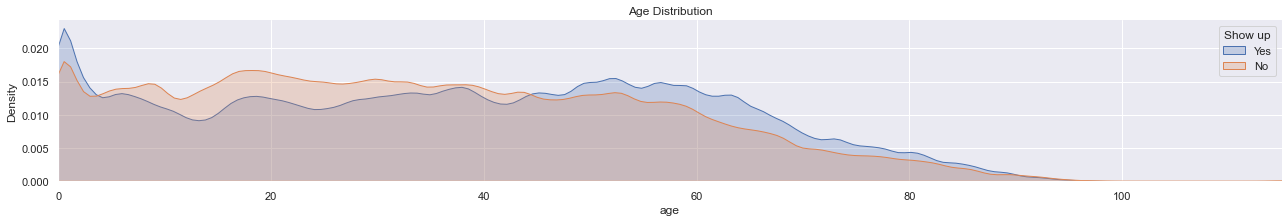

In [50]:
# we see the kde plot that is less cluttered will help us understand the distribution in a simpler way
oldest = df['age'].max()

plot_kde(col='age', hue='no_show', bw_adjust=.35, aspect=6,xlim=(0, oldest),
         title='Age Distribution', legend_labels=['Yes', "No"], legend_title="Show up")

from the ages distribution we can see that


- from 0 to 5 years old more patients show up
- from 5 to 45 years more patients didn't show up 
- from 45 to 90 years more patients show up


 ### Research Question 7: Is there a relationship between the waiting time and the number of patients showing up?

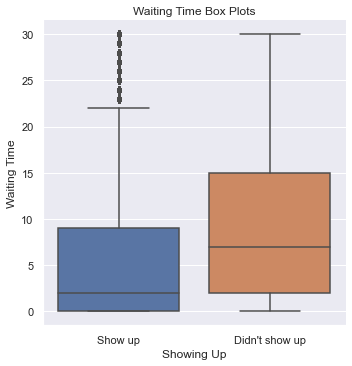

In [51]:
cat_plot(x='no_show', y='waiting_time', kind='box', title='Waiting Time Box Plots', xlabel='Showing Up', ylabel='Waiting Time')

- 75% of patients who didn't show up their waiting time was less than or equal to 15 days.
- more than 75% of patients who show up their waiting time was less than 10 days, and 50% was less than 3 days.
- excluding the outliers all the patients who show up their waiting time was less than 23 days.

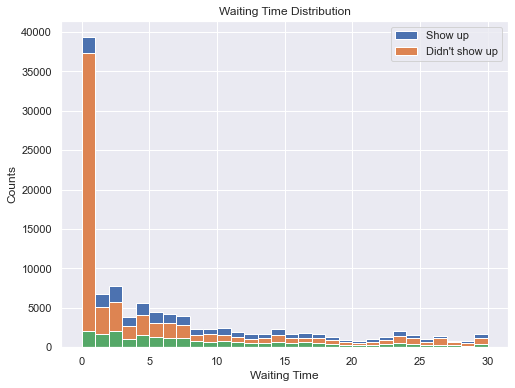

In [52]:
# check distribution
plot_hist(col='waiting_time', bins=30, title="Waiting Time Distribution", xlabel="Waiting Time",
          ylabel="Counts", legend=['Show up', "Didn't show up"], figsize=(8, 6))

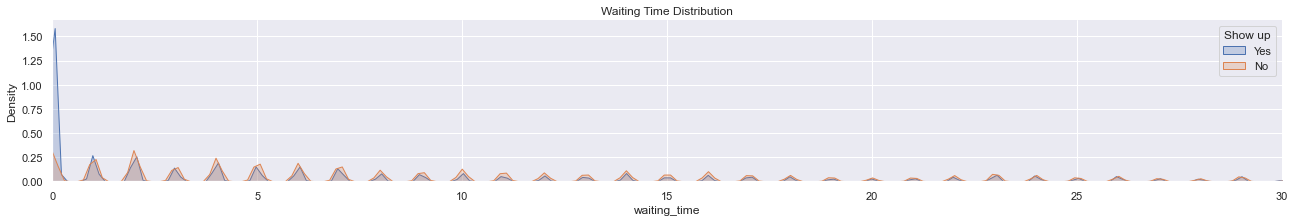

In [53]:
# check the distribution of waiting time with a kde plot
max_waiting_time = df['waiting_time'].max()

plot_kde(col='waiting_time', hue='no_show', bw_adjust=0.1, aspect=6, xlim=(0, max_waiting_time),
         title="Waiting Time Distribution", legend_labels=['Yes', "No"], legend_title="Show up")

from the distribution we can see that patients who schedule an appointment in the same day have significatly high propablity to show up 

and those who schedule in the next day its probable that they will show up

other wise it's probable that they won't show up

<a id='conclusions'></a>
## Conclusions


### findings
- approximately 20% of the patients didn't show up in there appointments
- the gender of the patient isn't related to showing up in the appointment since males have a showing up percentage 80.03%
and females have a showing up percentage 79.69% so close to be the same.


- 32.11% of the patients recieved an SMS
- 72.43 of those who recieved an SMS showed up and 83.30% of those who didn't receive an SMS showed up
- People who didn't recieve an SMS have a showing up percentage higher by 10.87% than those who recieved
- 29.13% of people who showed up received an SMS and 43.84% of people who didn't show up received an SMS.

so based on these facts we see that although the proportion of people who should up from those who didn't receive an SMS is higher we can't say that there is a correlation here.


- 76.26% of people who have a scholarship show up and 80.19% of people who have no scholarship show up.
- 11.55% of the people that didn't show up have a scholarship thats higher than those who did show up by 2.16% and this difference is relatively big.


- 82% of patients were having a special condition and show up and only 18% didn't show up.


- the highest neighbourhood showing up ratio is associated with 'ILHAS OCEÂNICAS DE TRINDADE' and that's obviosly because it only has to records
so we can't indicate something special.

#### the age distribution is right skewed and we saw from it that
both the age distrubutions of people who show up or didn't are pretty similer
- from 0 to 5 years old more patients show up
- from 5 to 45 years more patients didn't show up 
- from 45 to 90 years more patients show up


#### the waiting time distribution is right skewed
- 75% of patients who didn't show up their waiting time was less than or equal to 15 days.
- more than 75% of patients who show up their waiting time was less than 10 days, and 50% was less than 3 days.
- excluding the outliers all the patients who show up their waiting time was less than 23 days.

- that patients who schedule an appointment in the same day have significatly high propablity to show up 

- and those who schedule in the next day its probable that they will show up

- other wise it's probable that they won't show up




### Limitations 
- only a very small proportion of the data is diagnosed with special cases and that makes the results not reliable.
- the documentation of the dataset was ambigous regarding the `appointment_day` and `scheduled_day` columns so it might affect the conclusions.
- in the handicap column there was values greater than one so we casted it to 1s this might be incorrect and affect the conclusions.